In [116]:
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

In [229]:
# Load the stock data
df = pd.read_csv('question4-stock-data.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
1980-03-17,0,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1980-03-18,1,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
1980-03-19,2,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
1980-03-20,3,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
1980-03-21,4,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [230]:
# Check for missing values
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

Missing values in the dataset:
Unnamed: 0      0
Adj Close      93
Close         117
High           95
Low           127
Open          103
Volume        145
dtype: int64


In [231]:
# Forward Fill missing values (propagate previous values)
df.fillna(method='ffill', inplace=True)

# After handling missing values, verify if there are still any missing values
print(f"Missing values after handling:\n{df.isnull().sum()}")

Missing values after handling:
Unnamed: 0    0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11788\254055977.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [232]:
# Create additional features based on the stock data
df['Price Change'] = df['Close'].pct_change()  # Daily price change
df['Moving Average 7'] = df['Close'].rolling(window=7).mean()  # 7-day moving average
df['Moving Average 30'] = df['Close'].rolling(window=30).mean()  # 30-day moving average
df['High-Low'] = df['High'] - df['Low']  # Daily high-low difference
df['Open-Close'] = df['Open'] - df['Close']  # Difference between open and close prices

# Drop rows with missing values after feature engineering
df.dropna(inplace=True)

In [233]:
df.head(50)

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume,Price Change,Moving Average 7,Moving Average 30,High-Low,Open-Close
Date,,,,,,,,,,,,
1980-04-28,29,2.502202,3.585565,3.639081,3.585565,0.000000,2803.0,0.011321,3.488089,3.374623,0.053516,-3.585565
1980-04-29,30,2.539549,3.639081,3.692597,3.639081,0.000000,74744.0,0.014925,3.518670,3.386218,0.053516,-3.639081
1980-04-30,31,2.548885,3.652460,3.705975,3.652460,0.000000,3737.0,0.003677,3.551162,3.397813,0.053515,-3.652460
1980-05-01,32,2.558223,3.665839,3.719354,3.665839,0.000000,934.0,0.003663,3.585565,3.409854,0.053515,-3.665839
1980-05-02,33,2.558223,3.665839,3.665839,3.665839,3.665839,0.0,0.000000,3.610412,3.421895,0.000000,0.000000
1980-05-05,34,2.576895,3.692597,3.746112,3.692597,0.000000,14015.0,0.007299,3.635258,3.432152,0.053515,-3.692597
1980-05-06,35,2.632913,3.772870,3.826386,3.772870,0.000000,5606.0,0.021739,3.667750,3.444640,0.053516,-3.772870
1980-05-07,36,2.632913,3.772870,3.772870,3.772870,3.772870,0.0,0.000000,3.694508,3.458018,0.000000,0.000000
1980-05-08,37,2.642250,3.786249,3.839765,3.786249,3.772870,7474.0,0.003546,3.715532,3.471843,0.053516,-0.013379


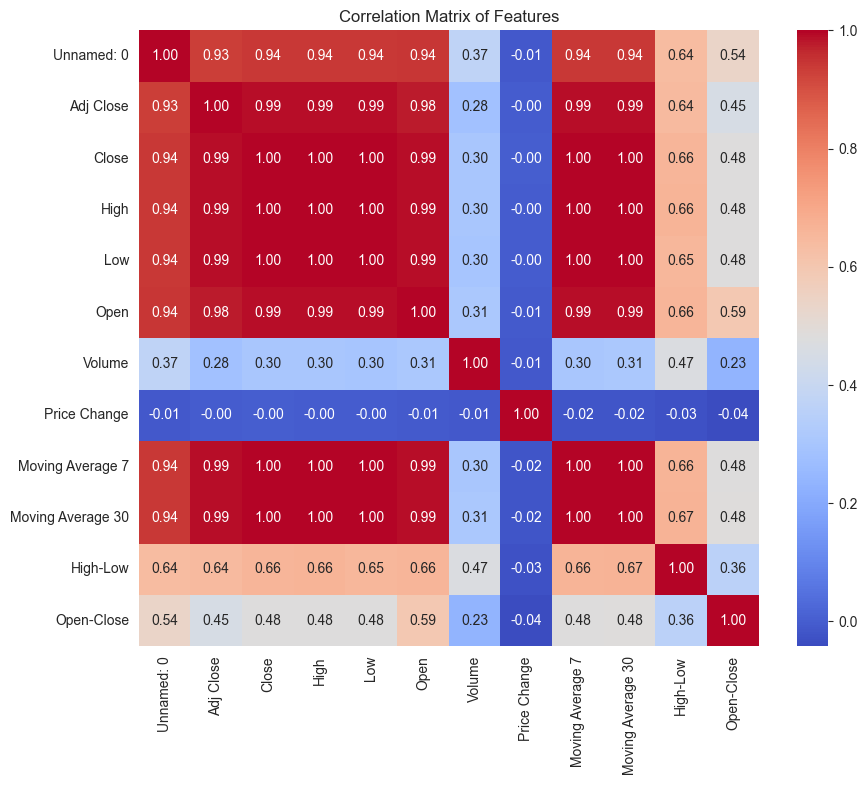

In [234]:
# Visualize the correlation between features
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [235]:
# Select features for training
features = ['Close', 'Price Change', 'Moving Average 7', 'Moving Average 30', 'High-Low', 'Open-Close']
df_features = df[features]

# Split data into training (90%) and testing (10%)
train_size = int(len(df_features) * 0.10)  # 5% training data
train = df_features[:train_size]

In [236]:
# Fit ARIMA model using exogenous variables
model = ARIMA(train['Close'], exog=train.drop('Close', axis=1), order=(5, 1, 0))
model_fit = model.fit()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

In [237]:
# Split the data to get the last 10% for testing
test_size = int(len(df_features) * 0.1)  # 10% test data
test = df_features[-test_size:]

# Forecast for the test set (last 10% of the data)
test_exog = test.drop('Close', axis=1)  # Exogenous variables for the test set
test_forecast = model_fit.forecast(steps=test_size, exog=test_exog)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


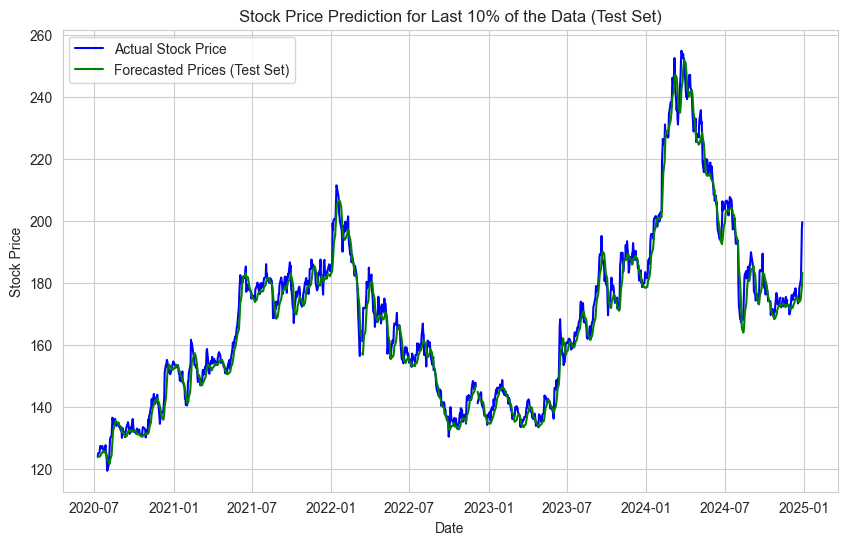

In [238]:
# Plot actual vs forecasted stock prices for the test set
plt.figure(figsize=(10, 6))
plt.plot(df.index[-test_size:], test['Close'], label='Actual Stock Price', color='blue')
plt.plot(df.index[-test_size:], test_forecast, label='Forecasted Prices (Test Set)', color='green')
plt.title('Stock Price Prediction for Last 10% of the Data (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [239]:
# Prepare future exogenous variables for the next 5 days
last_known_features = df_features.iloc[-1, 1:]  # Extract the last row of features excluding 'Close'
future_exog = np.tile(last_known_features.values, (5, 1))  # Repeat for the next 5 days

# Forecast the next 30 days of stock prices
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps, exog=future_exog)

# Generate future dates for the forecast
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Skip the last known date


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


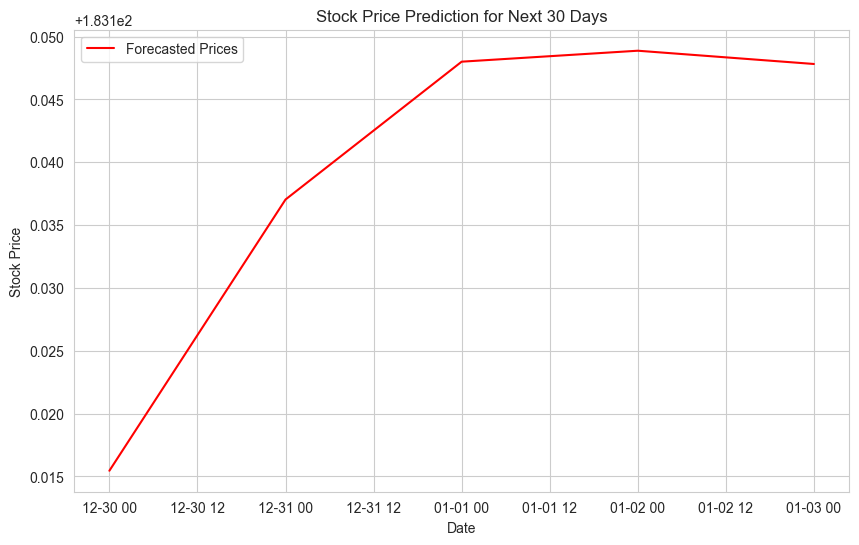

In [242]:
# Plot forecasted stock prices for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(future_dates, forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Prediction for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [245]:
# Evaluate the model's performance for the test set
rmse = math.sqrt(mean_squared_error(test['Close'], test_forecast))
r2 = 1 - (rmse / np.std(test['Close']))
print(f"Root Mean Squared Error for Test Set: {rmse}")
print(f"R^2 Score for Test Set: {r2}")


Root Mean Squared Error for Test Set: 4.030064989777995
R^2 Score for Test Set: 0.8526604625524599
